#### Librerias

In [1]:
import geopandas as gpd
from src.dowload_dem import INEGI_API


#### Se lee el shape de la cartas 1:1000 (div10k) y del polígono del cual se quieren descargar los dem de INEGI

In [2]:
poligono = gpd.read_file("inputs/cdmx.zip")
div10 = gpd.read_file("inputs/div10k.zip")

#### Se optienen las cartas a descargar 

Mediante la intersección de las cartas 1:1000  con el polígono

<Axes: >

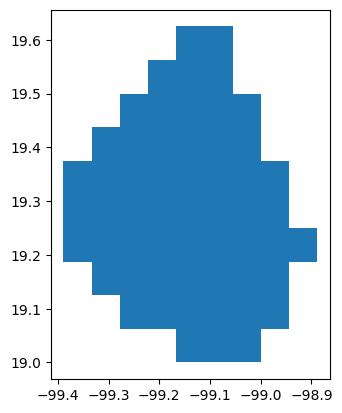

In [3]:
cartas = div10[div10.geometry.intersects(poligono.union_all())]
cartas.plot()

#### Se descargan los DEM de INEGI

En este ejemplo se van a descargar los dem de terreno en formato '.grid' de INEGI

In [5]:
datos = {
    "clave": "", #clave de la carta 1:10000
    "tipo" :"terreno", #terreno  o superficie
    "ext"  : 3, #  0: Bill,  1: Ascii,  2: Grid, 3:tif
    "folder": "output/" #carpeta de salida
}

inegi_api = INEGI_API()

for clave in cartas["clave10k"].to_list():
    datos["clave"]= clave
    inegi_api.download_dem(datos)


e14a29e2 no tiene información
e14a29e3 no tiene información
e14a29e4 no tiene información
e14a29f1 no tiene información
e14a29f3 no tiene información
e14a38f2   descargado y guardado
e14a38f4   descargado y guardado
e14a39a2   descargado y guardado


KeyboardInterrupt: 